# Analysis

In this notebook, the dataset obtained previously will be analized. We will look for correlations and use k-means ML algorithm in order to group countries with respect to the crucial indicators. <br>
Again, we start with importing libraries and loading the dataset.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

joined_df = pd.read_csv('data_joined.csv', index_col = 'country')
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, afghanistan to zimbabwe
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surface_area                155 non-null    float64
 1   population                  155 non-null    int64  
 2   population_density          155 non-null    float64
 3   gdp_gross_domestic_product  155 non-null    int64  
 4   gdp_growth_rate             155 non-null    float64
 5   gdp_per_capita              155 non-null    float64
 6   trade_export                155 non-null    float64
 7   trade_import                155 non-null    float64
 8   co2_emission_estimates      155 non-null    int64  
 9   energy_production_primary   155 non-null    float64
 10  capacity_mw                 155 non-null    float64
 11  capacity_factor             155 non-null    float64
 12  generation                  155 non-null    float64
 13  generation_biomass       

### Correlations

<center> <strong>FURTHER DESCRIBTION WILL BE ADDED SOON<strong> <center>

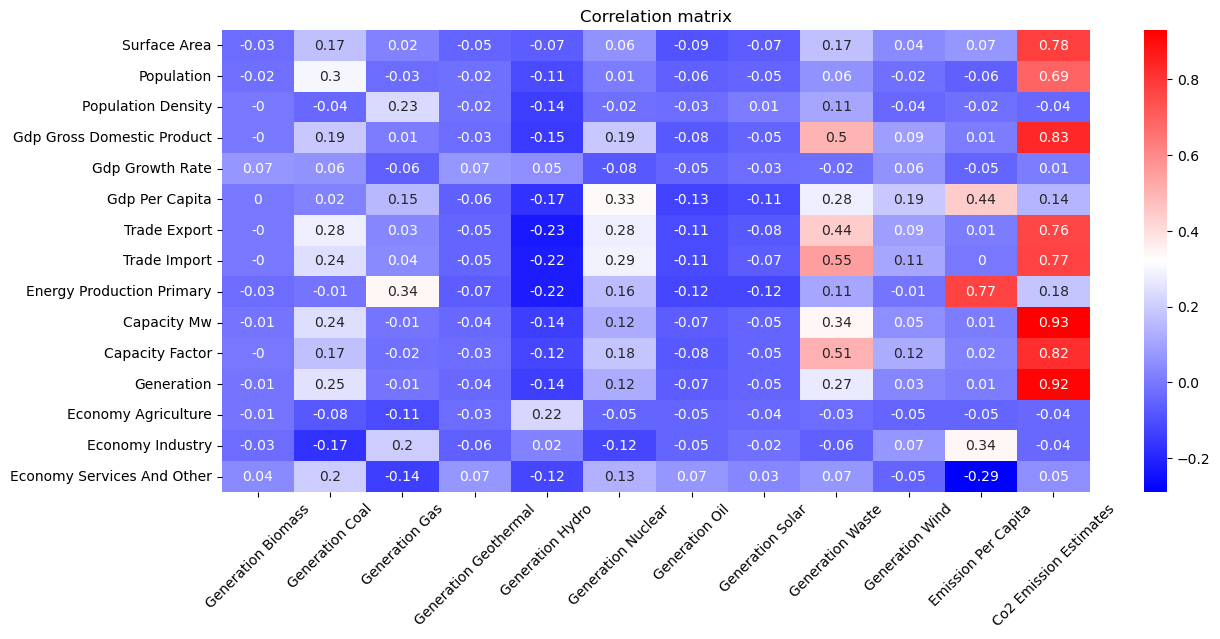

In [37]:
x_ind = [i for i in range(13,24)] + [8]
y_ind = [i for i in range(8)] + [i for i in range(9, 13)] + [i for i in range(24,27)]

correlations = round(joined_df.corr().iloc[y_ind, x_ind],2)
correlations.columns = correlations.columns.str.replace('_',' ').str.title()
correlations.index = correlations.index.str.replace('_',' ').str.title() 

plt.figure(figsize = (14,6))
sns.heatmap(correlations, cmap = 'bwr', annot = True)
plt.xticks(rotation = 45)
plt.title('Correlation matrix')
plt.show()

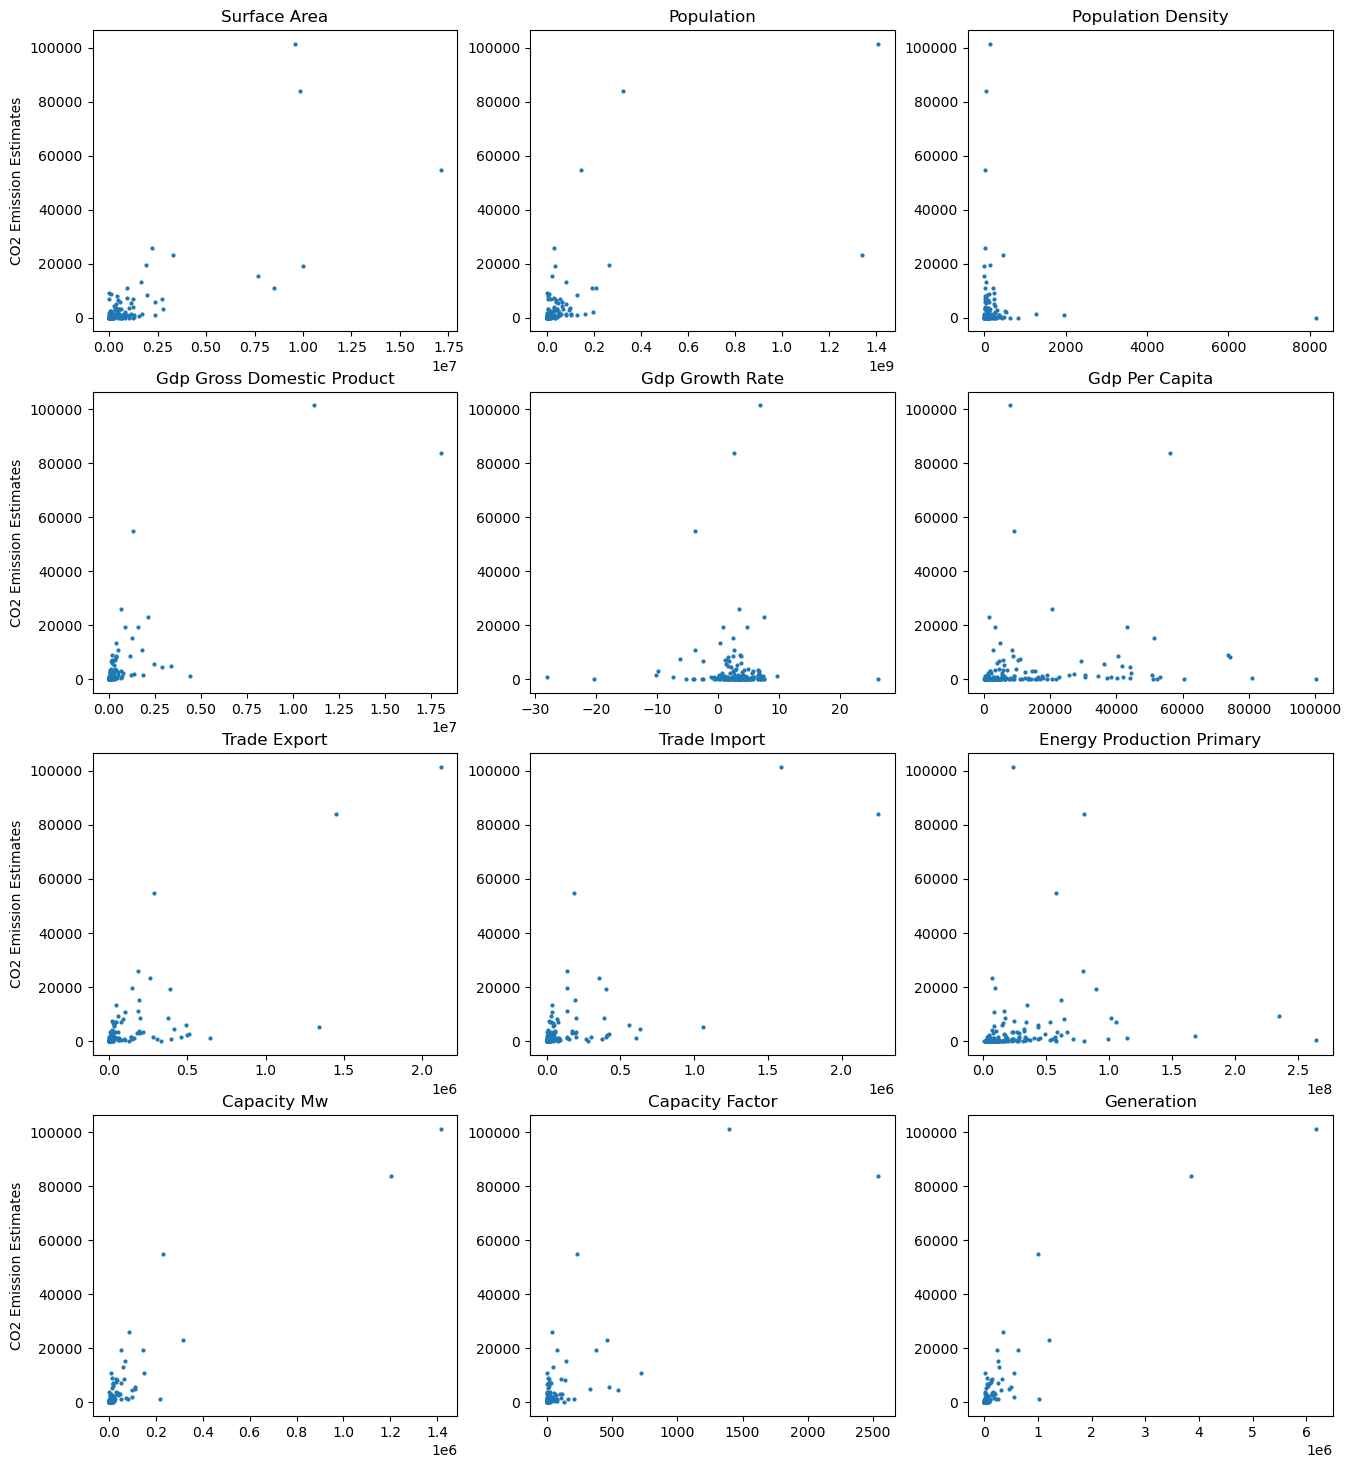

In [39]:
y_cols = correlations.index[:-3].str.lower().str.replace(' ','_')

fig, axs = plt.subplots(4,3)
plt.rc('figure', figsize=(16, 18))

for i in range(4):
    for j in range(3):
        joined_df.plot.scatter(x = y_cols[3*i + j], y = 'co2_emission_estimates', ax = axs[i,j], s = 4)
        axs[i,j].set_xlabel('')
        if j > 0:
            axs[i,j].set_ylabel('')
        else:
            axs[i,j].set_ylabel('CO2 Emission Estimates')
        axs[i,j].set_title(y_cols[3*i + j].replace('_',' ').title())

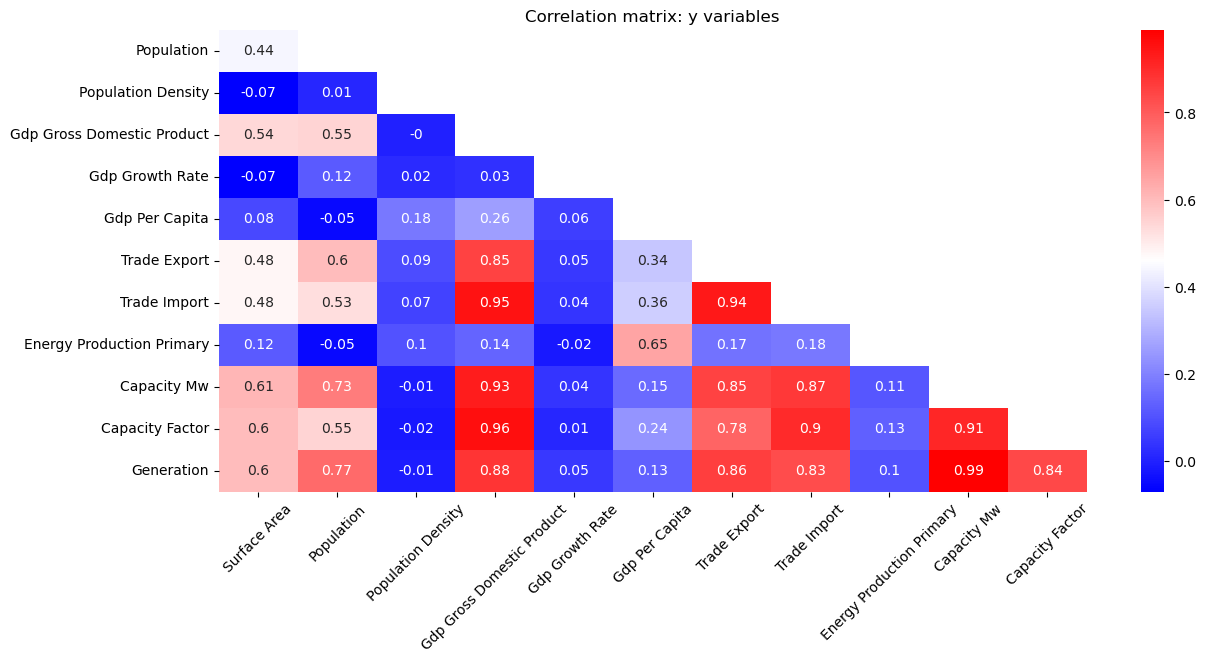

In [40]:
correlations_y = round(joined_df[y_cols].corr(), 2)
for i in range(correlations_y.shape[0]):
    for j in range(correlations_y.shape[1]):
        if j >= i:
            correlations_y.iloc[i, j] = np.nan
correlations_y.drop('surface_area', axis = 0, inplace = True)
correlations_y.drop('generation', axis = 1, inplace = True)

correlations_y.columns = correlations_y.columns.str.replace('_',' ').str.title()
correlations_y.index = correlations_y.index.str.replace('_',' ').str.title() 

plt.figure(figsize = (14,6))
sns.heatmap(correlations_y, cmap = 'bwr', annot = True)
plt.xticks(rotation = 45)
plt.title('Correlation matrix: y variables')
plt.show()

In [41]:
pd.DataFrame({
'CO2 Emission': joined_df.sort_values('co2_emission_estimates', ascending = False).index[:5],
'GDP': joined_df.sort_values('gdp_gross_domestic_product', ascending = False).index[:5],
'Population': joined_df.sort_values('population', ascending = False).index[:5],
'Population Density': joined_df.sort_values('population_density', ascending = False).index[:5]})

,CO2 Emission,GDP,Population,Population Density
0,china,united states of america,china,singapore
1,united states of america,china,india,bahrain
2,russia,japan,united states of america,bangladesh
3,saudi arabia,germany,indonesia,palestine
4,india,united kingdom,brazil,mauritius


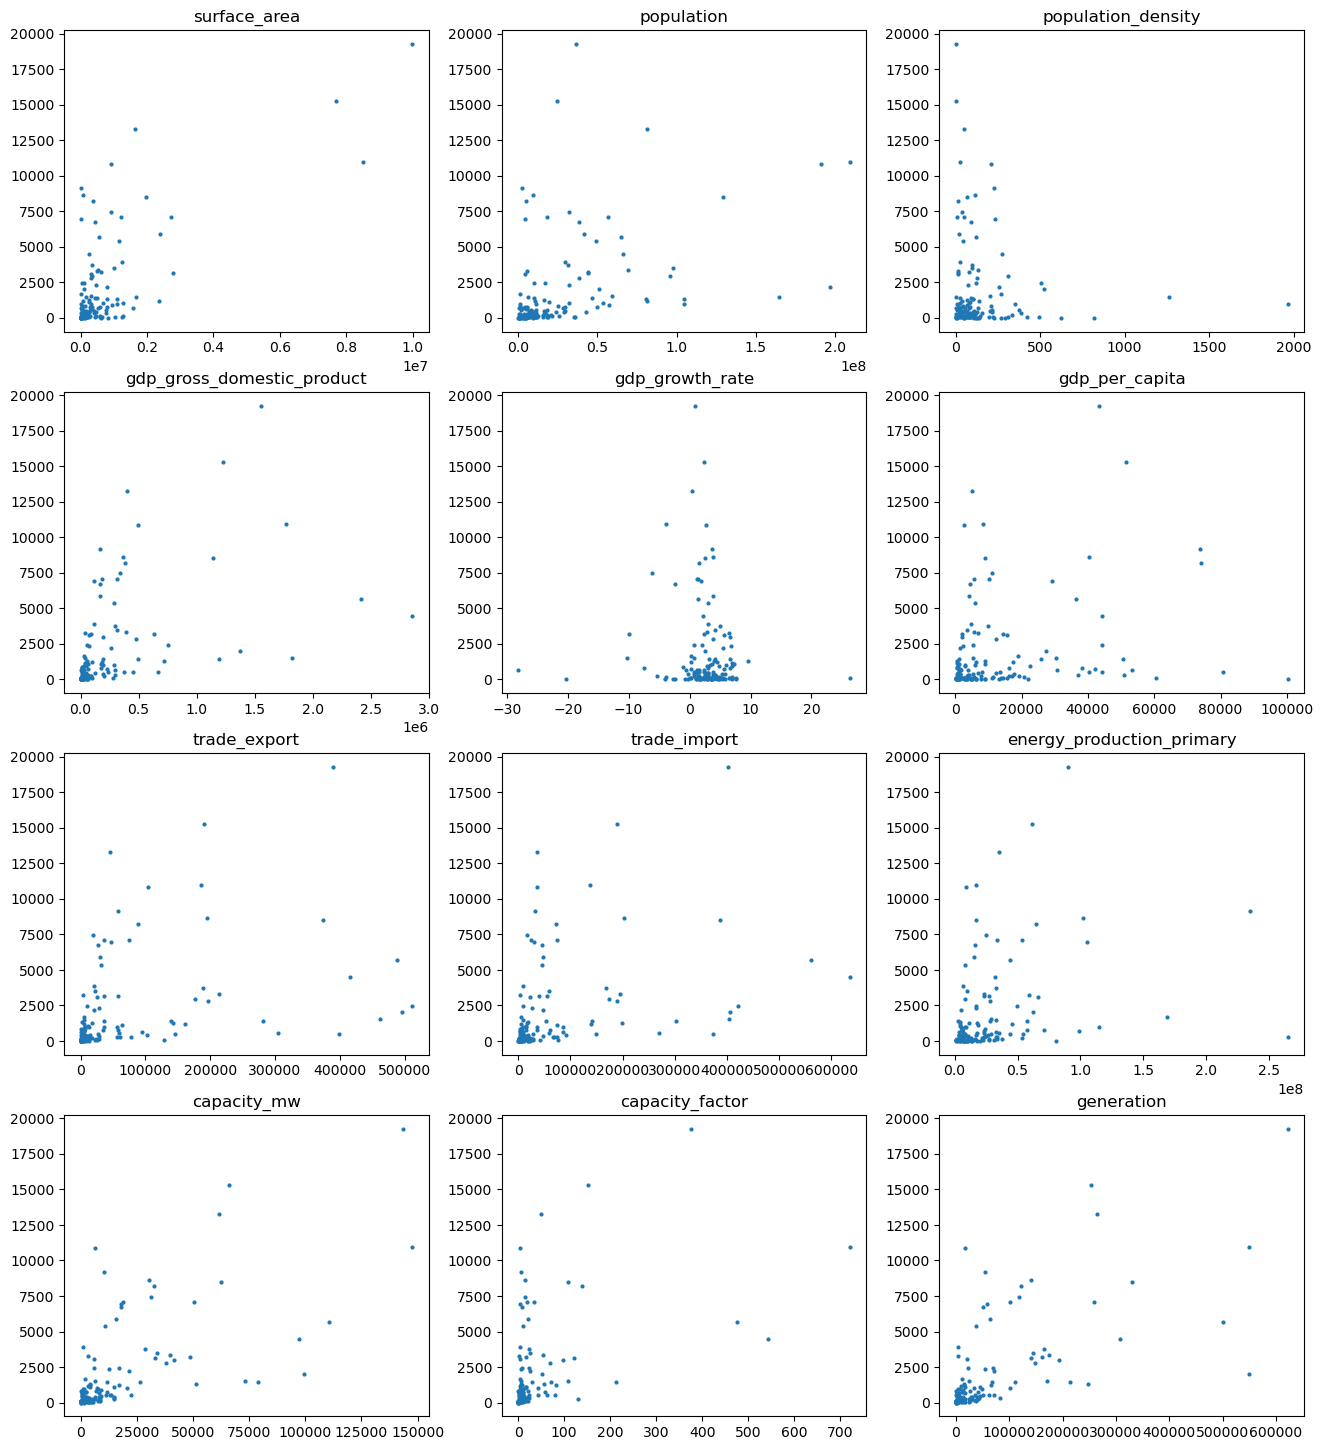

In [42]:
df_shorter = joined_df.drop(['china', 'united states of america', 'russia', 'saudi arabia', 'japan', 'germany', 'indonesia', 'india', 'singapore'], axis = 0)

fig, axs = plt.subplots(4,3)
plt.rc('figure', figsize=(16, 18))

for i in range(4):
    for j in range(3):
        df_shorter.plot.scatter(x = y_cols[3*i + j], y = 'co2_emission_estimates', ax = axs[i,j], s = 4)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        axs[i,j].set_title(y_cols[3*i + j])

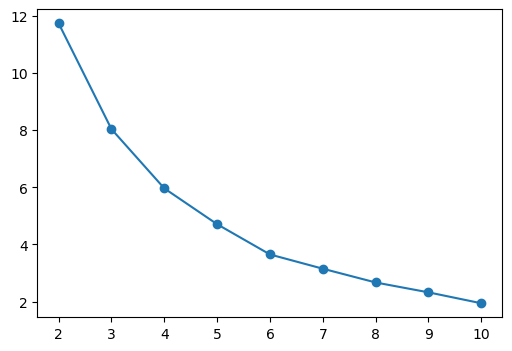

In [43]:
X = joined_df[['co2_emission_estimates', 'gdp_gross_domestic_product', 'generation', 'population']].copy()
X.drop(['russia', 'united states of america', 'china', 'india'], inplace = True)

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)
X_scaled['co2_emission_estimates'] = 2*X_scaled['co2_emission_estimates']

n = []
inertia = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(X_scaled)
    n.append(i)
    inertia.append(model.inertia_)
    
plt.figure(figsize = (6,4))
plt.plot(n, inertia, '-o')

In [44]:
n_clust = 6
model = KMeans(n_clusters = n_clust, random_state = 138)
model.fit(X_scaled)
X.loc[:,'cluster'] = model.predict(X_scaled) + 1

X['cluster'].value_counts()

1    112
2     16
4     10
6      5
5      5
3      3
Name: cluster, dtype: int64

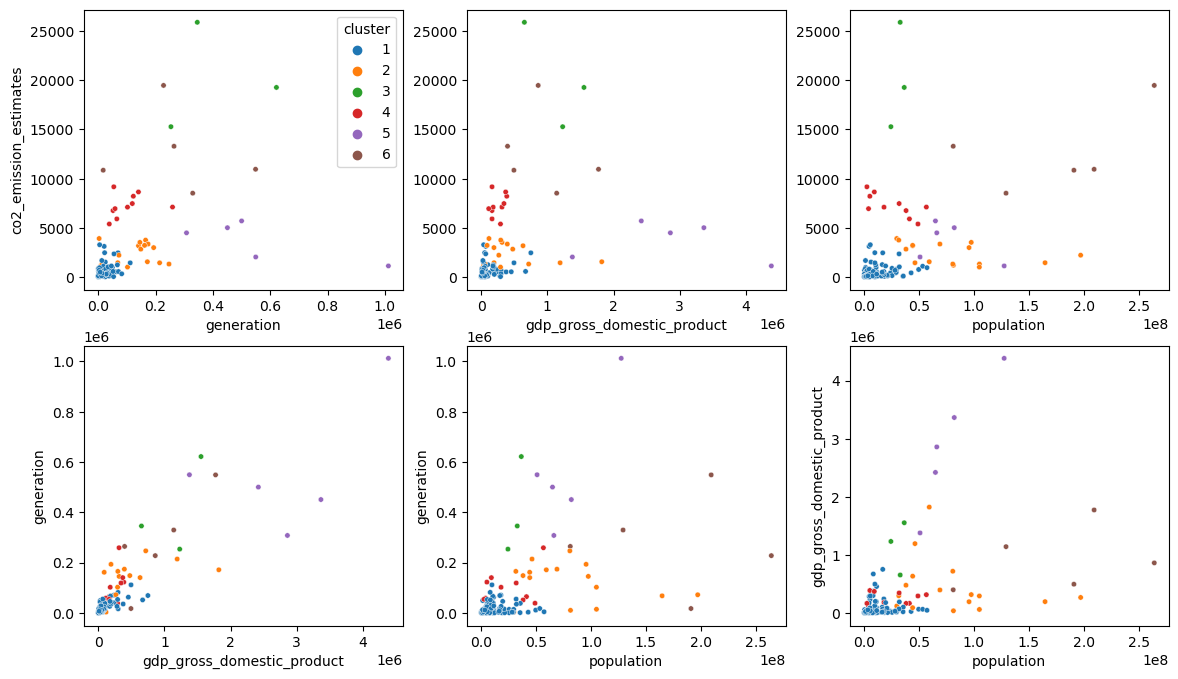

In [46]:
fig, axs = plt.subplots(2,3)
plt.rc('figure', figsize=(14, 8))

sns.scatterplot(data = X, x = 'generation', y = 'co2_emission_estimates', hue = 'cluster', palette = 'tab10', ax = axs[0,0], s = 15)
sns.scatterplot(data = X, x = 'gdp_gross_domestic_product', y = 'co2_emission_estimates', hue = 'cluster', palette = 'tab10', ax = axs[0,1], legend = False, s = 15)
axs[0,1].set_ylabel('')
sns.scatterplot(data = X, x = 'population', y = 'co2_emission_estimates', hue = 'cluster', palette = 'tab10', ax = axs[0,2], legend = False, s = 15)
axs[0,2].set_ylabel('')

sns.scatterplot(data = X, y = 'generation', x = 'gdp_gross_domestic_product', hue = 'cluster', palette = 'tab10', ax = axs[1,0], s = 15, legend = False)
sns.scatterplot(data = X, y = 'generation', x = 'population', hue = 'cluster', palette = 'tab10', ax = axs[1,1], legend = False, s = 15)
sns.scatterplot(data = X, x = 'population', y = 'gdp_gross_domestic_product', hue = 'cluster', palette = 'tab10', ax = axs[1,2], legend = False, s = 15)
plt.show()


In [47]:
cluster_series = []
for i in range(1, n_clust + 1):
    cluster_series.append(pd.Series(X[X['cluster'] == i].index, name = str(i)))

clusters = pd.concat(cluster_series, axis = 1)
clusters = clusters.fillna('-')
clusters.iloc[:20]

,1,2,3,4,5,6
0,afghanistan,angola,australia,algeria,france,brazil
1,albania,argentina,canada,colombia,germany,indonesia
2,armenia,bangladesh,saudi arabia,iraq,japan,iran
3,austria,democratic republic of the congo,-,kazakhstan,south korea,mexico
4,azerbaijan,egypt,-,kuwait,united kingdom,nigeria
5,bahrain,ethiopia,-,norway,-,-
6,belarus,italy,-,qatar,-,-
7,belgium,malaysia,-,south africa,-,-
8,benin,pakistan,-,united arab emirates,-,-
9,bhutan,philippines,-,venezuela,-,-


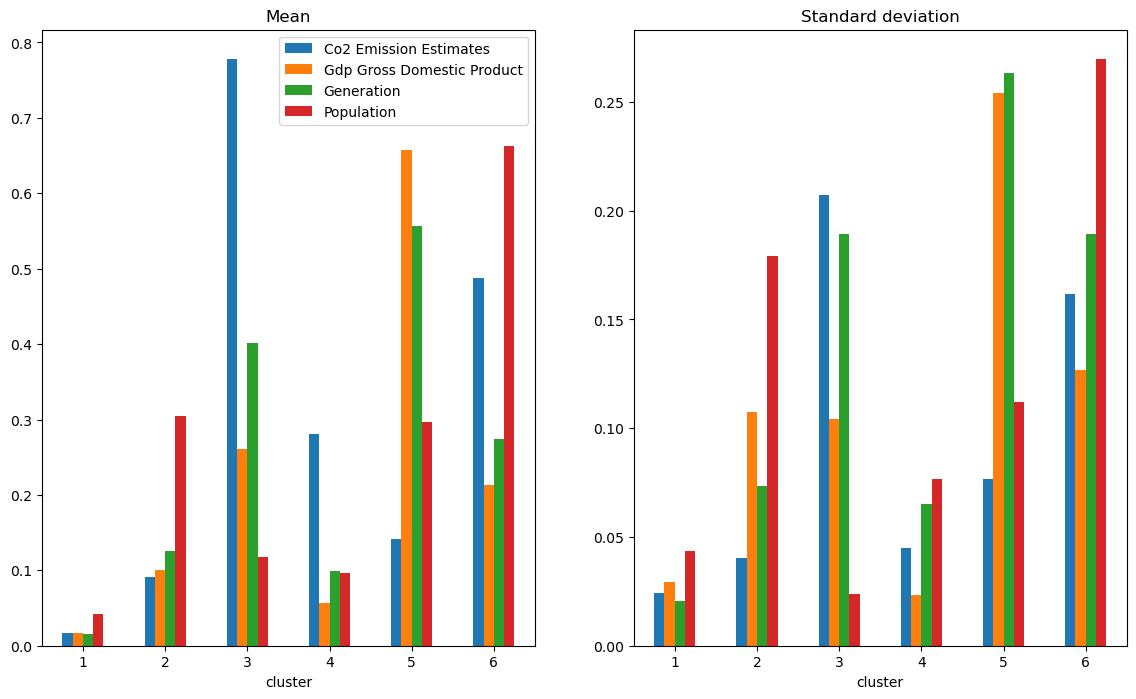

In [48]:
X_norm = X_scaled.iloc[:,:4].join(X[['cluster']])
X_norm['co2_emission_estimates'] = X_scaled['co2_emission_estimates']/2

fig, axs = plt.subplots(1,2)
plt.rc('figure', figsize = (14, 6))

clusters_mean = X_norm.groupby('cluster').mean()
clusters_mean.columns = clusters_mean.columns.str.replace('_', ' ').str.title()
clusters_std = X_norm.groupby('cluster').std()

clusters_mean.plot.bar(rot = 0, ax = axs[0])
axs[0].set_title('Mean')
clusters_std.plot.bar(rot = 0, ax = axs[1], legend = False)
axs[1].set_title('Standard deviation')
plt.show()

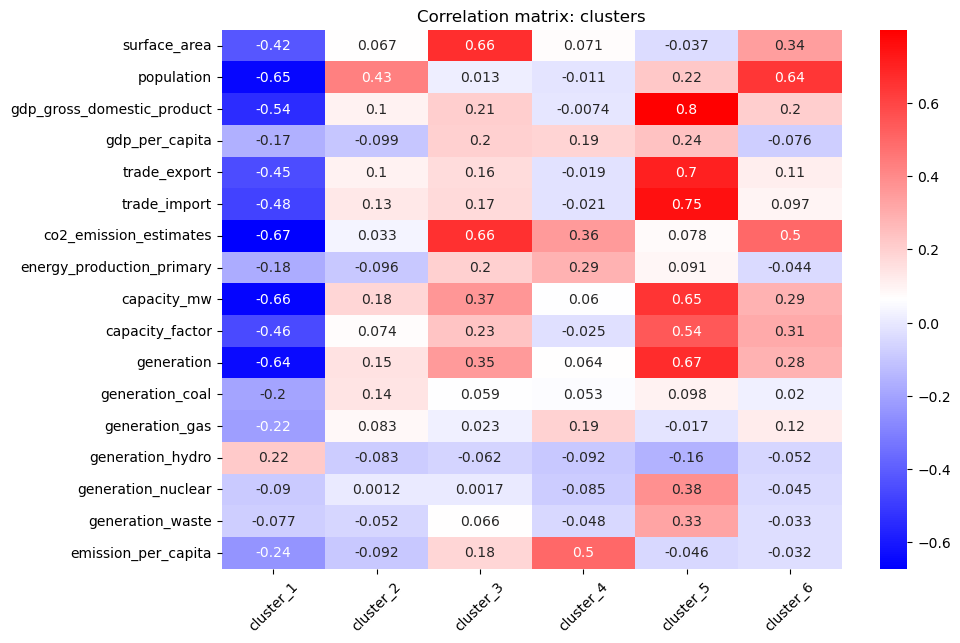

In [49]:
clustered_df = joined_df.drop(['russia', 'united states of america', 'china', 'india'])
clustered_df = clustered_df.join(pd.get_dummies(X['cluster'], prefix = 'cluster'))
correlations_cl = clustered_df.corr().iloc[:-6,-6:]
correlations_cl = correlations_cl[(correlations_cl.max(axis = 1) > 0.15) | (correlations_cl.min(axis = 1) < -0.15)]

plt.figure(figsize = (10,7))
sns.heatmap(correlations_cl, cmap = 'bwr', annot = True)
plt.xticks(rotation = 45)
plt.title('Correlation matrix: clusters')
plt.show()

In [50]:
clustered_df = clustered_df.join(X['cluster']).groupby('cluster').mean()
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surface_area                6 non-null      float64
 1   population                  6 non-null      float64
 2   population_density          6 non-null      float64
 3   gdp_gross_domestic_product  6 non-null      float64
 4   gdp_growth_rate             6 non-null      float64
 5   gdp_per_capita              6 non-null      float64
 6   trade_export                6 non-null      float64
 7   trade_import                6 non-null      float64
 8   co2_emission_estimates      6 non-null      float64
 9   energy_production_primary   6 non-null      float64
 10  capacity_mw                 6 non-null      float64
 11  capacity_factor             6 non-null      float64
 12  generation                  6 non-null      float64
 13  generation_biomass          6 non-null 

<AxesSubplot:xlabel='cluster'>

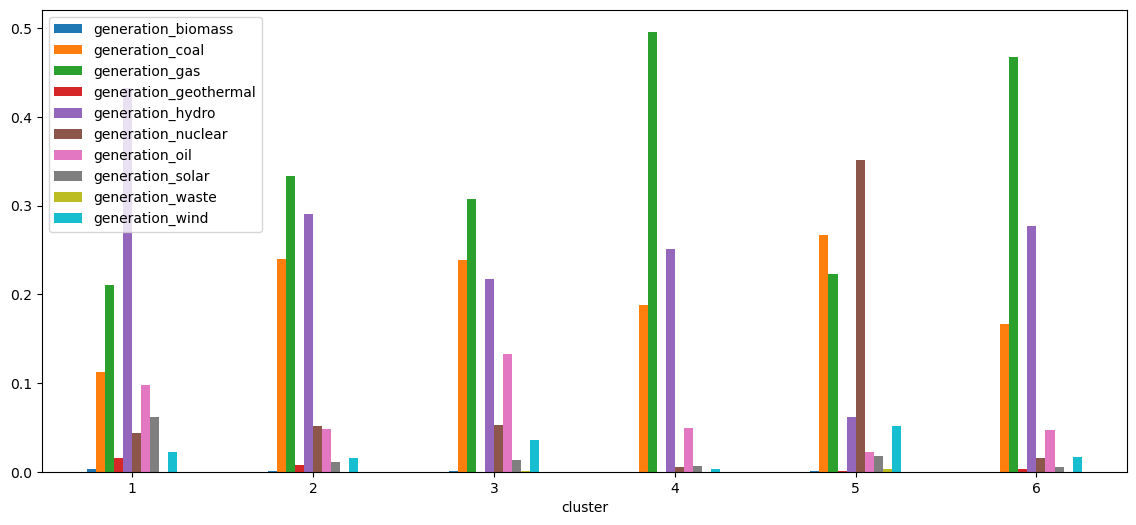

In [51]:
clustered_df.iloc[:,13:23].plot.bar(rot = 0)

<AxesSubplot:>

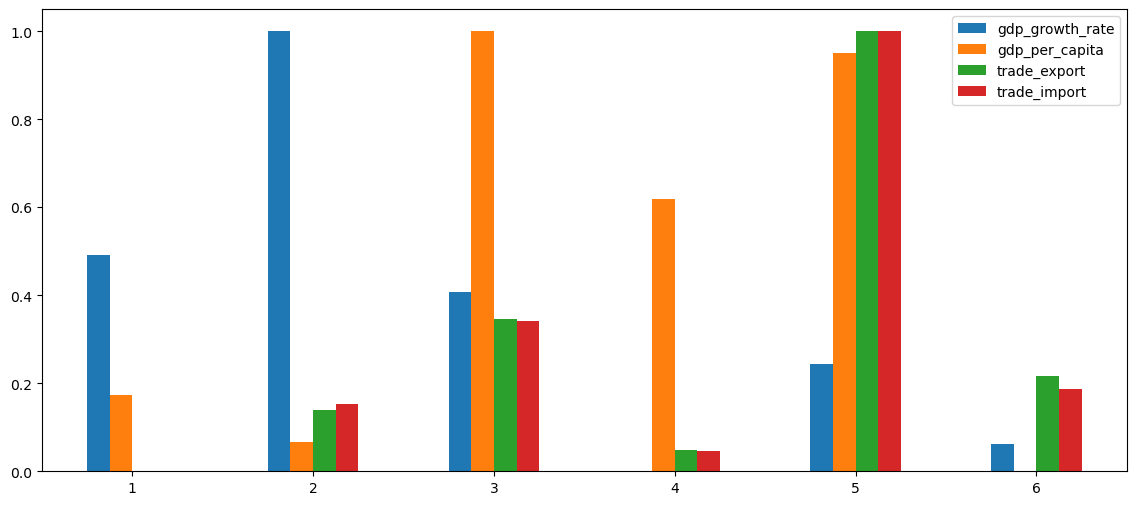

In [57]:
pd.DataFrame(scaler.fit_transform(clustered_df.iloc[:,4:8]), columns = clustered_df.columns[4:8], index = range(1,7)).plot.bar(rot = 0)

In [54]:
clustered_df.columns[4:8]

Index(['gdp_growth_rate', 'gdp_per_capita', 'trade_export', 'trade_import'], dtype='object')

In [55]:
scaler.fit_transform(clustered_df.iloc[:,4:8])

array([[0.4913008 , 0.17363259, 0.        , 0.        ],
       [1.        , 0.06742433, 0.13903957, 0.15274672],
       [0.40849984, 1.        , 0.34554458, 0.34099412],
       [0.        , 0.61844388, 0.0474765 , 0.04672189],
       [0.24357755, 0.95146469, 1.        , 1.        ],
       [0.06089439, 0.        , 0.21735682, 0.18662521]])